## Assignment 1: 15-Arm Bandit Simulation

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
fixed_rewards= np.linspace(5,19,15)
fixed_rewards

array([ 5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17.,
       18., 19.])

In [3]:
prob_rewards = [np.random.normal(x) for x in fixed_rewards]

### Expected Reward:

Q<sub>n+1</sub> = Q<sub>n</sub> + 1/n(R<sub>n</sub>-Q<sub>n</sub>) <br>
Q<sub>0</sub>(a) = 5

In [4]:
Q_0 = 5

In [5]:
np.random.rand()

0.08707161498674643

In [6]:
def rewards(action,fixed=True):
    rewards = np.linspace(5,19,15)
    
    if fixed:
        return rewards[action]
    else:
        rewards = [np.random.normal(x) for x in fixed_rewards]
        return rewards[action]

In [7]:
rewards(2,False)

6.036556369417947

Q[i][action] = rewards(action)+(1/(i))*(rewards(action)-Q[i-1][action])

Iteration 1: 0
Q[i] = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5] 
Q[i] max: 5, action selected: 11
Iteration 1: 2000
Q[i] = [5, 5, 5, 5.00354583618634, 5.006842313286934, 5.002861383868953, 5.017972821866617, 5.017252606920287, 5.010123996538612, 5.0284103846724895, 15.00129758606885, 5.0204983426445775, 5, 5.007424206152049, 5] 
Q[i] max: 15.00129758606885, action selected: 11
Iteration 1: 4000
Q[i] = [5, 5.001842587382077, 5, 5.00354583618634, 5.008444345685199, 5.004413160327091, 5.021760404435561, 5.017252606920287, 5.023265894787758, 5.034128730312083, 15.001660953138632, 5.0204983426445775, 5.003812832937643, 5.007424206152049, 5] 
Q[i] max: 15.001660953138632, action selected: 11


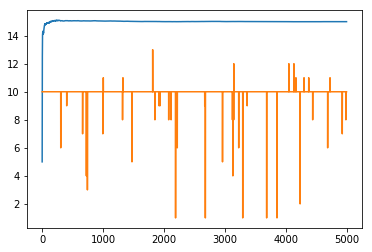

In [13]:
# Init
Q = {}
epsilon = 0.01
action_value = {}

for i in range(0,5000):
    if i == 0:
        Q[i] = [5 for i in range(0,15)]
        action = np.random.randint(1,15)
    else:
        Q[i][action] = Q[i-1][action]+(1/(i+1))*(rewards(action,False)-Q[i-1][action]) 
        #Q[i][action] = Q[i][action]+0.01*(rewards(action)-Q[i][action]) 
        #print(Q[i][action],(1/(i)),(rewards(action),Q[i][action])) 
        
        if np.random.rand() > epsilon:
            action = np.argmax(Q[i])
        else:
            action = np.random.randint(1,15)
        
    action_value[i] = [np.array(Q[i]).max(),action]
    if i%2000==0:
        print("Iteration {}: {}\nQ[i] = {} \nQ[i] max: {}, action selected: {}".format(1%10,
                i,Q[i],np.array(Q[i]).max(),action+1))
    Q[i+1] = Q[i]

plt.plot(list(action_value.values()))
plt.show()

In [12]:
#action_value

In [11]:
#plt.plot(list(action_value.values()))
#plt.show()